In [2]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [13]:
all_mods = {
    'train': np.load('../results/arrays/train_MSEs_norm_control_stdev_control.npy'),
    'test': np.load('../results/arrays/test_MSEs_norm_control_stdev_control.npy'),
    'M_norm': np.load('../results/arrays/M_norms_norm_control_stdev_control.npy'),
    'stdev': np.load('../results/arrays/stdevs_norm_control_stdev_control.npy'),
}

no_norm = {
    'train': np.load('../results/arrays/train_MSEs_stdev_control.npy'),
    'test': np.load('../results/arrays/test_MSEs_stdev_control.npy'),
    'M_norm': np.load('../results/arrays/M_norms_stdev_control.npy'),
    'stdev': np.load('../results/arrays/stdevs_stdev_control.npy'),
}
eig_norm = {
    'train': np.load('../results/arrays/train_MSEs_norm_control_stdev_control_eig.npy'),
    'test': np.load('../results/arrays/test_MSEs_norm_control_stdev_control_eig.npy'),
    'M_norm': np.load('../results/arrays/M_norms_norm_control_stdev_control_eig.npy'),
    'stdev': np.load('../results/arrays/stdevs_norm_control_stdev_control_eig.npy'),
}

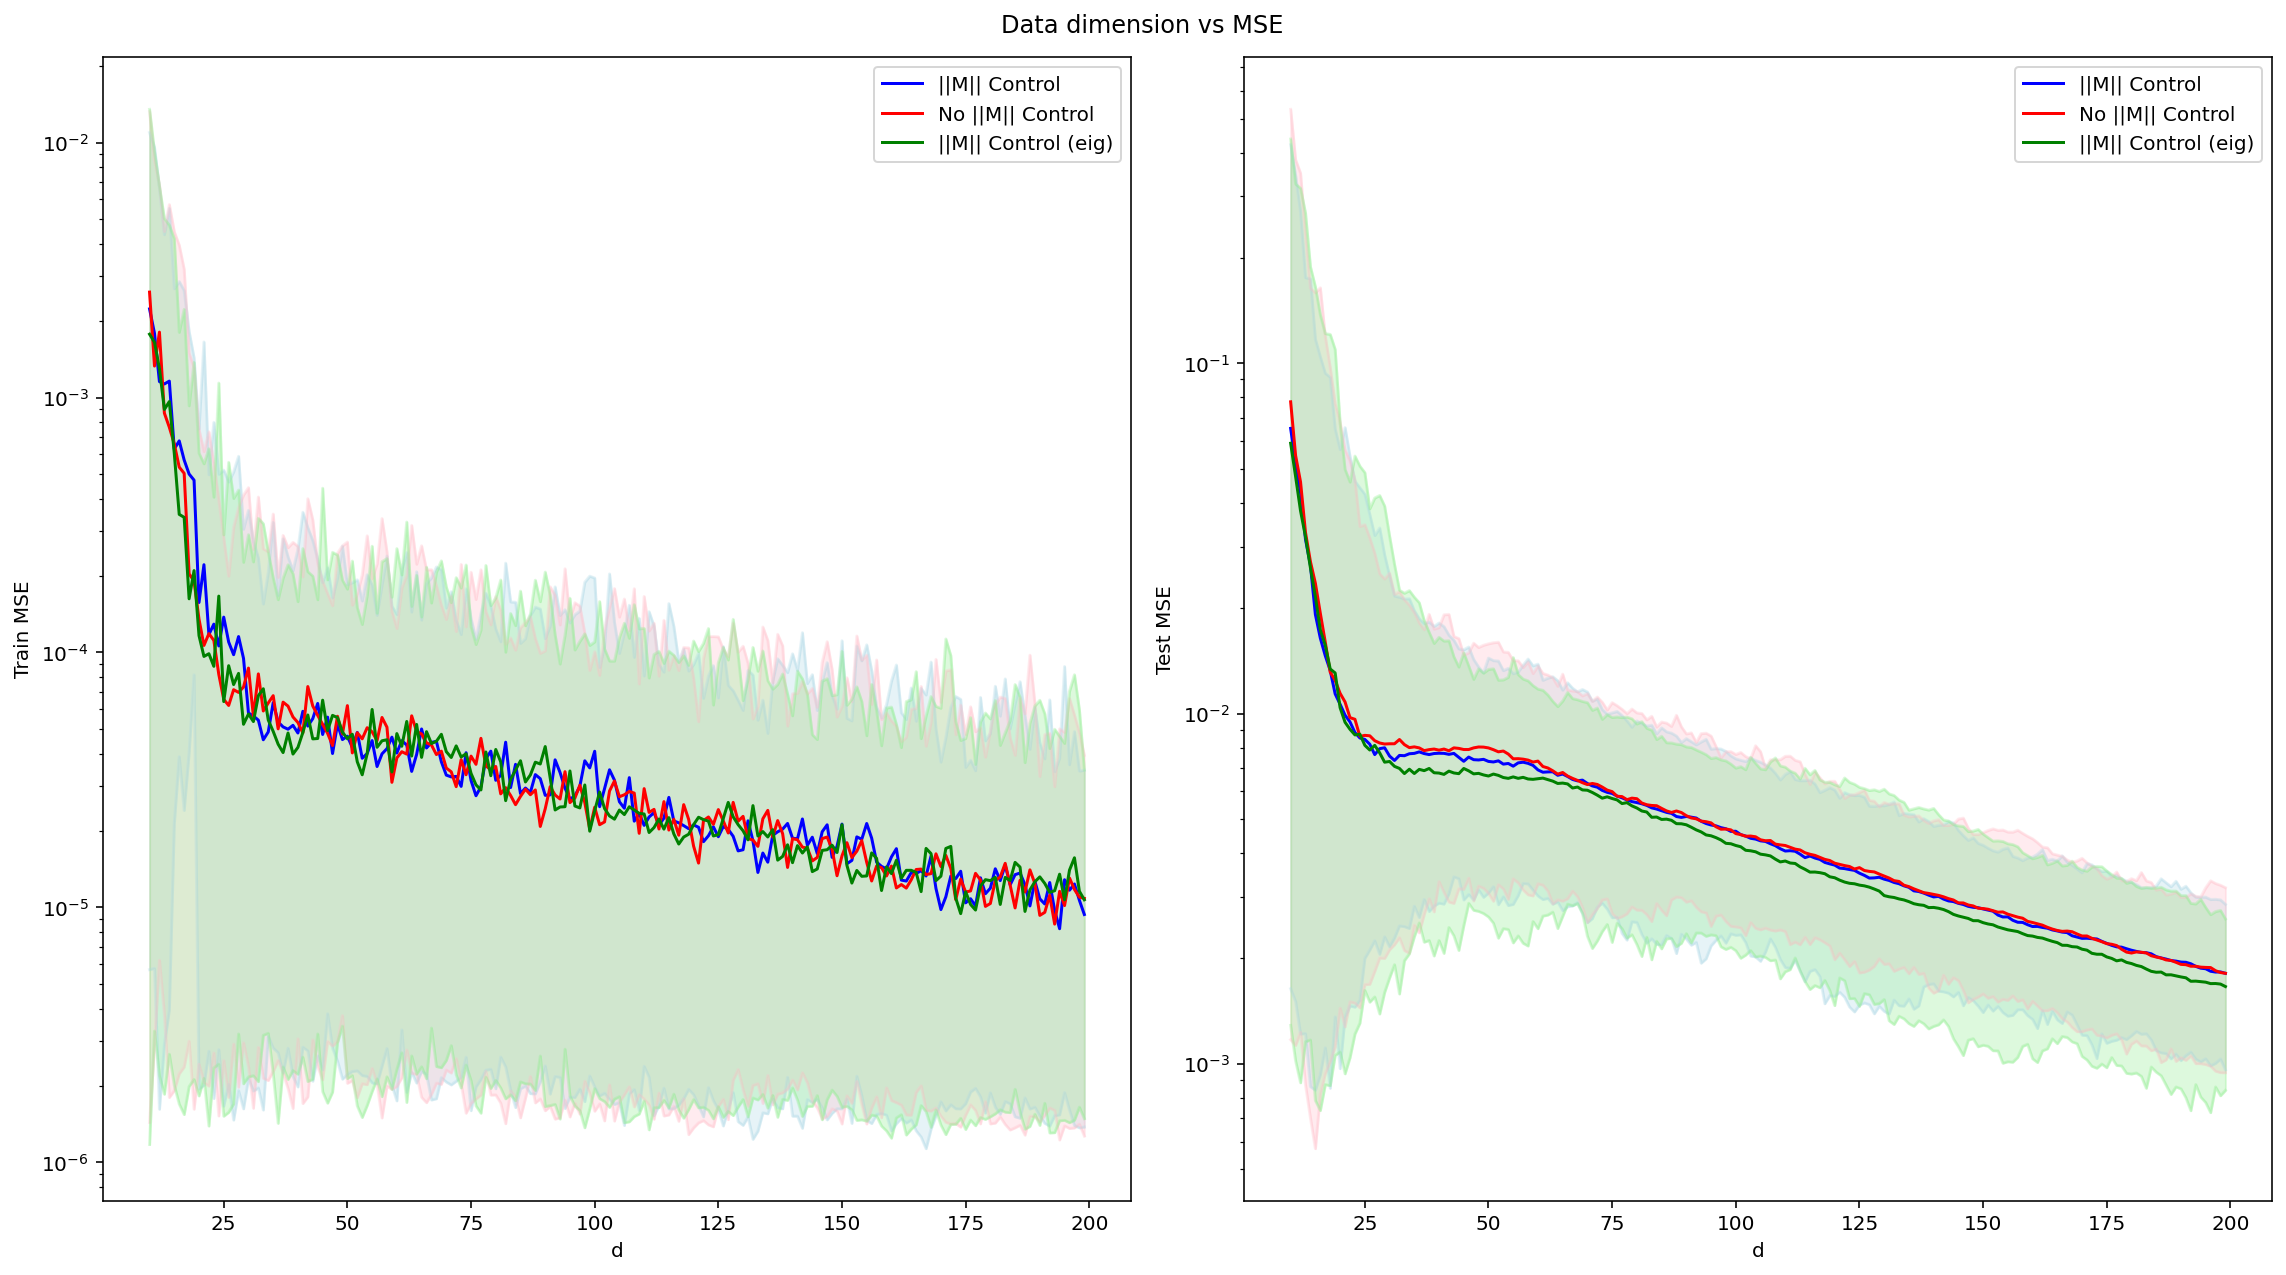

In [17]:
# plot the train and test MSEs
d_range = list(range(10, 200))

all_mods['train_mean'] = all_mods["train"].mean(axis=0)
all_mods['test_mean'] = all_mods["test"].mean(axis=0)
no_norm['train_mean'] = no_norm["train"].mean(axis=0)
no_norm['test_mean'] = no_norm["test"].mean(axis=0)
eig_norm['train_mean'] = eig_norm["train"].mean(axis=0)
eig_norm['test_mean'] = eig_norm["test"].mean(axis=0)

# get 2.5% and 97.5% quantiles
all_mods['train_025'] = np.quantile(all_mods["train"], 0.025, axis=0)
all_mods['train_975'] = np.quantile(all_mods["train"], 0.975, axis=0)
all_mods['test_025'] = np.quantile(all_mods["test"], 0.025, axis=0)
all_mods['test_975'] = np.quantile(all_mods["test"], 0.975, axis=0)
no_norm['train_025'] = np.quantile(no_norm["train"], 0.025, axis=0)
no_norm['train_975'] = np.quantile(no_norm["train"], 0.975, axis=0)
no_norm['test_025'] = np.quantile(no_norm["test"], 0.025, axis=0)
no_norm['test_975'] = np.quantile(no_norm["test"], 0.975, axis=0)
eig_norm['train_025'] = np.quantile(eig_norm["train"], 0.025, axis=0)
eig_norm['train_975'] = np.quantile(eig_norm["train"], 0.975, axis=0)
eig_norm['test_025'] = np.quantile(eig_norm["test"], 0.025, axis=0)
eig_norm['test_975'] = np.quantile(eig_norm["test"], 0.975, axis=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle("Data dimension vs MSE")

ax1.plot(d_range, all_mods['train_mean'], color='blue', label="||M|| Control")
ax1.plot(d_range, no_norm['train_mean'], color='red', label="No ||M|| Control")
ax1.plot(d_range, eig_norm['train_mean'], color='green', label="||M|| Control (eig)")
ax1.plot(d_range, all_mods["train_025"], color='lightblue', alpha=0.3)
ax1.plot(d_range, all_mods["train_975"], color='lightblue', alpha=0.3)
ax1.plot(d_range, no_norm["train_025"], color='pink', alpha=0.3)
ax1.plot(d_range, no_norm["train_975"], color='pink', alpha=0.3)
ax1.plot(d_range, eig_norm["train_025"], color='lightgreen', alpha=0.3)
ax1.plot(d_range, eig_norm["train_975"], color='lightgreen', alpha=0.3)
ax1.fill_between(d_range, all_mods['train_025'], all_mods['train_975'], color='lightblue', alpha=0.3)
ax1.fill_between(d_range, no_norm['train_025'], no_norm['train_975'], color='pink', alpha=0.3)
ax1.fill_between(d_range, eig_norm['train_025'], eig_norm['train_975'], color='lightgreen', alpha=0.3)
ax1.set_xlabel("d")
ax1.set_ylabel("Train MSE")
ax1.set_yscale("log")
ax1.legend()

ax2.plot(d_range, all_mods['test_mean'], label="||M|| Control", color='blue')
ax2.plot(d_range, no_norm['test_mean'], label="No ||M|| Control", color='red')
ax2.plot(d_range, eig_norm['test_mean'], label="||M|| Control (eig)", color='green')
ax2.plot(d_range, all_mods["test_025"], color='lightblue', alpha=0.3)
ax2.plot(d_range, all_mods["test_975"], color='lightblue', alpha=0.3)
ax2.plot(d_range, no_norm["test_025"], color='pink', alpha=0.3)
ax2.plot(d_range, no_norm["test_975"], color='pink', alpha=0.3)
ax2.plot(d_range, eig_norm["test_025"], color='lightgreen', alpha=0.3)
ax2.plot(d_range, eig_norm["test_975"], color='lightgreen', alpha=0.3)
ax2.fill_between(d_range, all_mods['test_025'], all_mods['test_975'], color='lightblue', alpha=0.3)
ax2.fill_between(d_range, no_norm['test_025'], no_norm['test_975'], color='pink', alpha=0.3)
ax2.fill_between(d_range, eig_norm['test_025'], eig_norm['test_975'], color='lightgreen', alpha=0.3)
ax2.set_xlabel("d")
ax2.set_ylabel("Test MSE")
ax2.set_yscale("log")
ax2.legend()

plt.tight_layout()

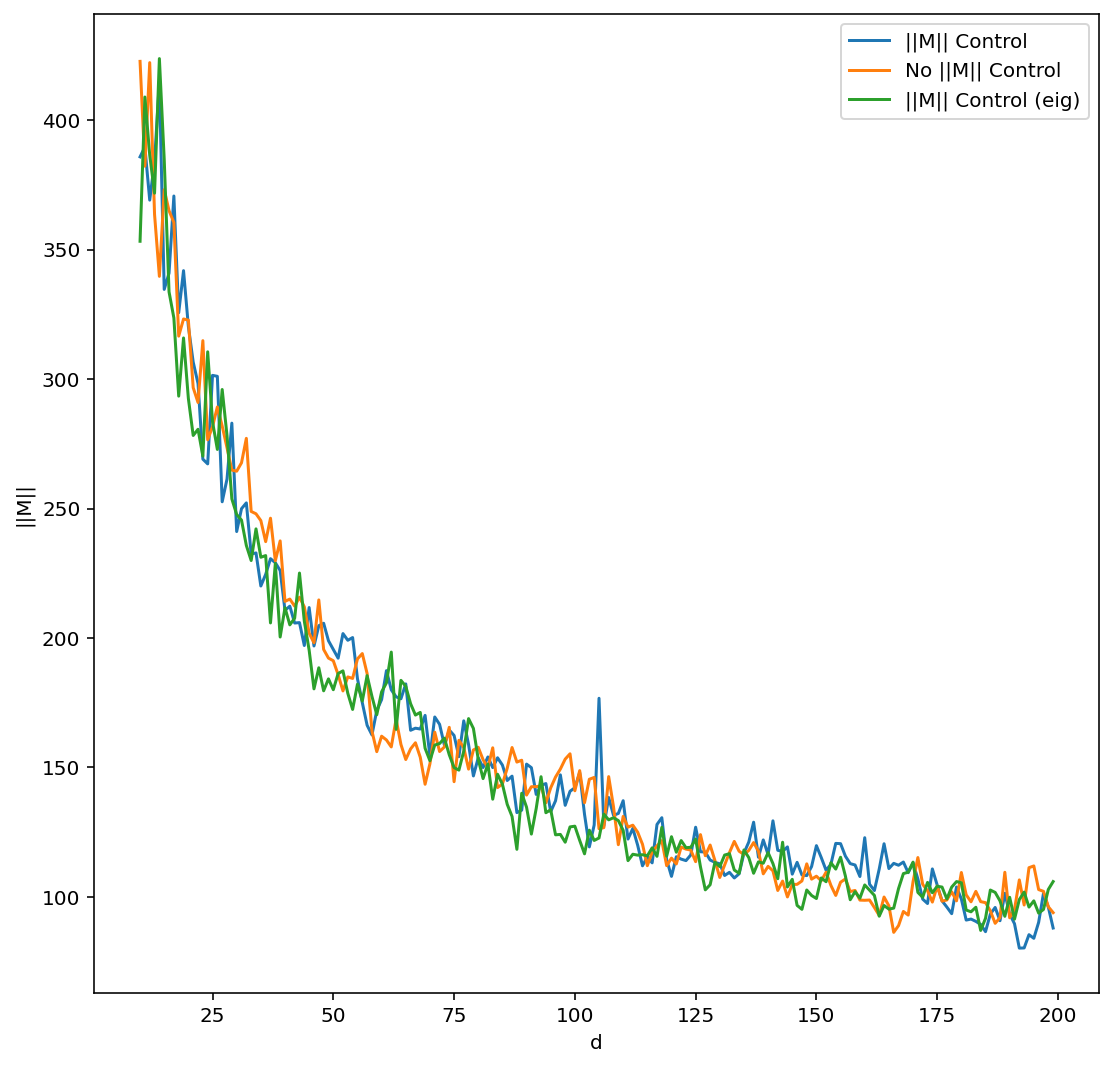

In [16]:
# plot Mnorms
fig = plt.figure(figsize=(9, 9))

# make means
all_mods['M_norm_mean'] = all_mods["M_norm"].mean(axis=0)
no_norm['M_norm_mean'] = no_norm["M_norm"].mean(axis=0)
eig_norm['M_norm_mean'] = eig_norm["M_norm"].mean(axis=0)

# plot
plt.plot(d_range, all_mods['M_norm_mean'], label="||M|| Control")
plt.plot(d_range, no_norm['M_norm_mean'], label="No ||M|| Control")
plt.plot(d_range, eig_norm['M_norm_mean'], label="||M|| Control (eig)")
plt.xlabel("d")
plt.ylabel("||M||")
plt.legend()

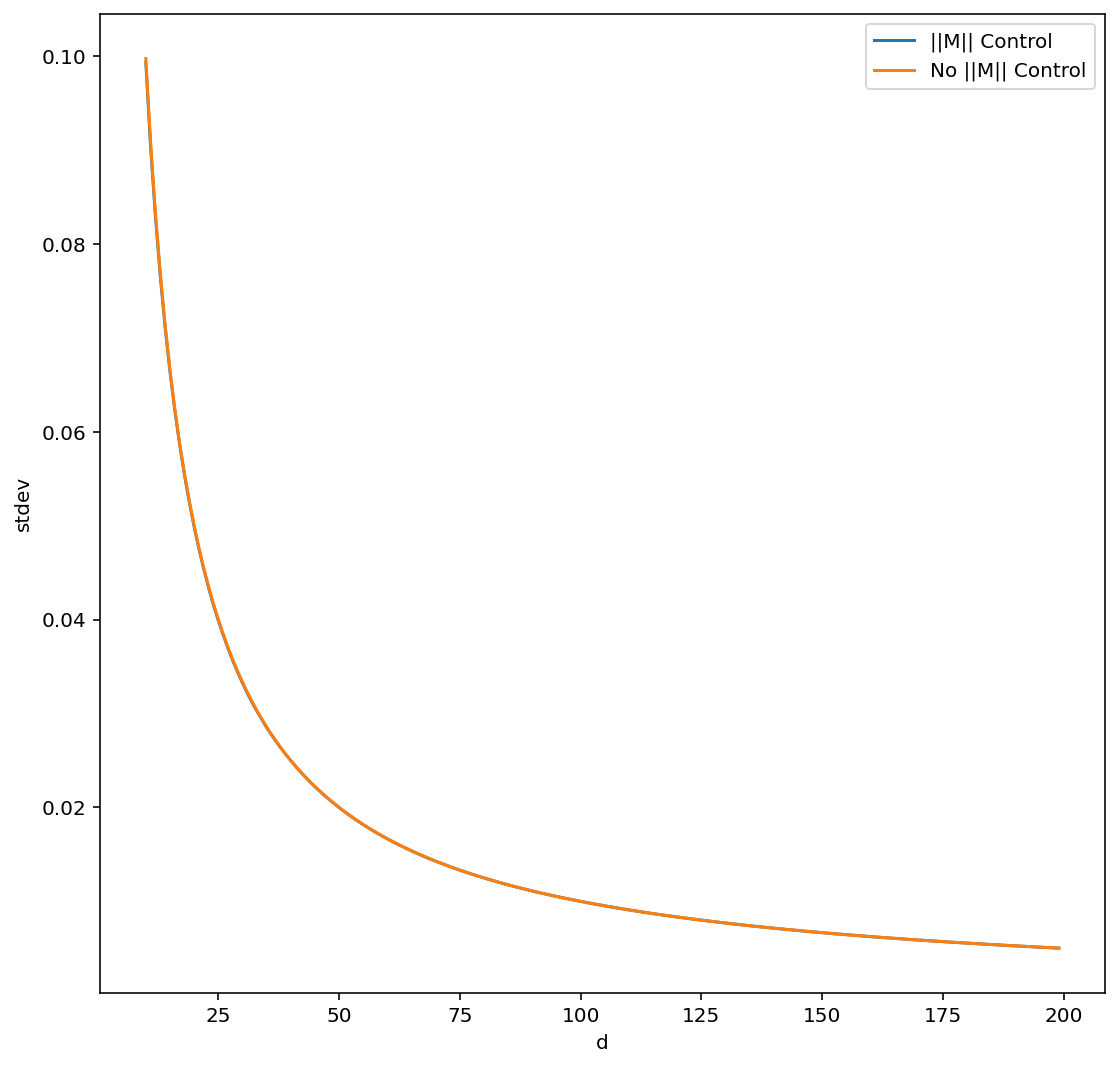

In [7]:
# plot stdevs
fig = plt.figure(figsize=(9, 9))

# make means
all_mods['stdev_mean'] = all_mods["stdev"].mean(axis=0)
no_norm['stdev_mean'] = no_norm["stdev"].mean(axis=0)

# plot
plt.plot(d_range, all_mods['stdev_mean'], label="||M|| Control")
plt.plot(d_range, no_norm['stdev_mean'], label="No ||M|| Control")
plt.xlabel("d")
plt.ylabel("stdev")
plt.legend()